In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


clients = pd.read_csv(r'churn.csv')
clients_df = clients.copy()
# Избавляемся от ненужных данных
clients_df = clients_df.drop(['RowNumber'], axis=1)
# Для более понятного отображения переназначил нули и единицы
clients_df['Exited'] = clients_df['Exited'].apply(lambda leave: 'Abandoned' if leave else 'Loyal')

display(clients_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


None

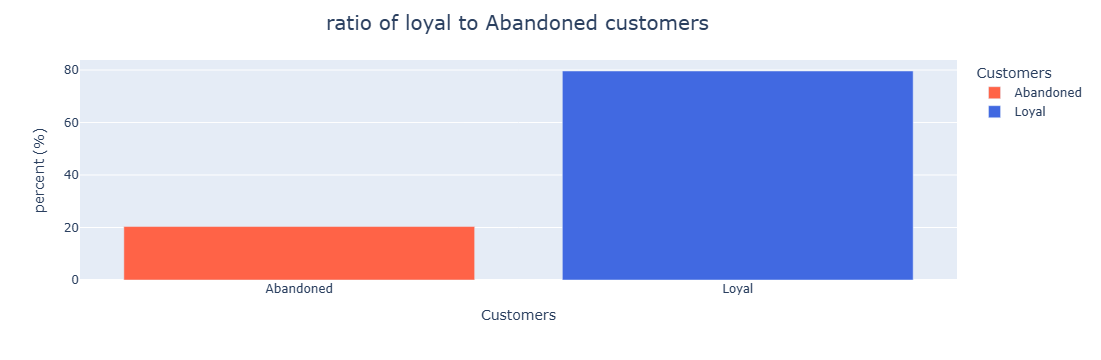

In [15]:
fig = px.bar(
    data_frame = clients_df['Exited'].value_counts().sort_values().apply(lambda x: x / 100),
    color = clients_df['Exited'].unique(),
    width = 1000,
    labels = {'color' : 'Customers', 'Exited': 'Customers'},
    color_discrete_sequence=['tomato', 'royalblue']
)

fig.update_layout(
    title_text = 'ratio of loyal to Abandoned customers',
    title_x = 0.47,
    title_font_size = 20,
    yaxis_title = 'percent (%)'
    )

fig.show()

Соотношение ушедших клиентов к лояльным примерно 1 к 5 (20%/80%), что является достаточно тревожным показателем

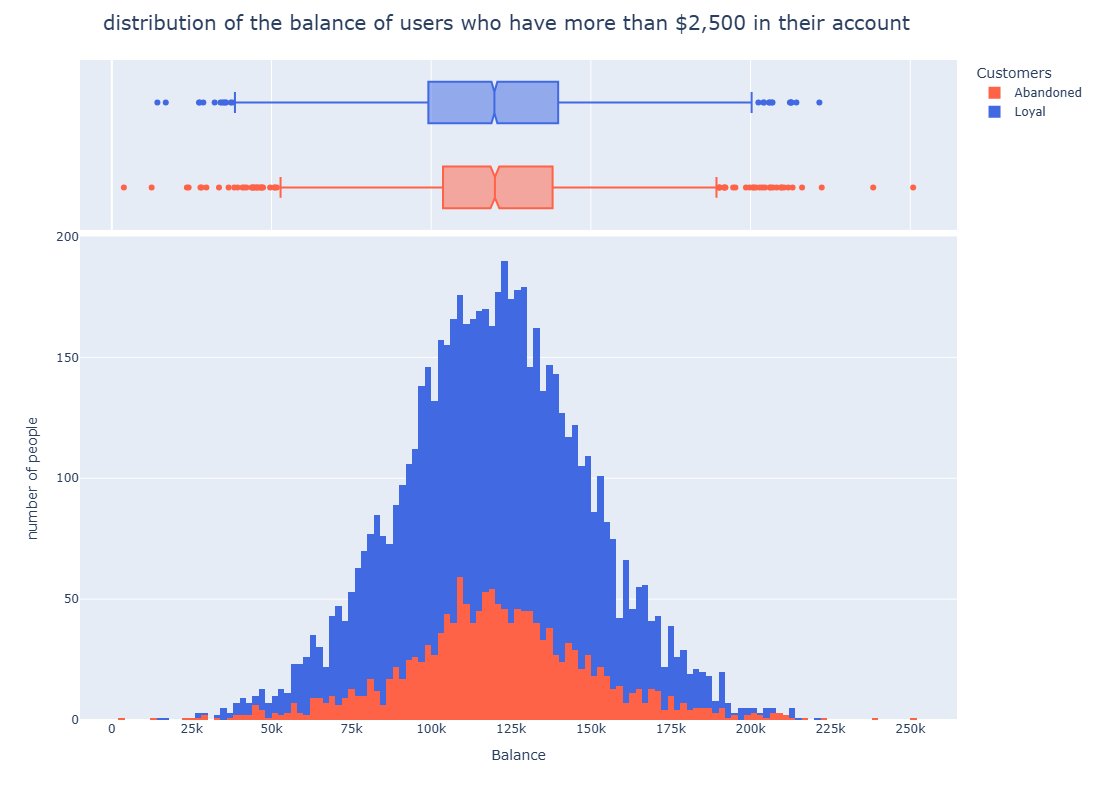

In [8]:
fig = px.histogram(
    data_frame = clients_df[clients_df['Balance'] > 2500].sort_values(by='Exited'),
    x = 'Balance',
    color = 'Exited',
    width = 1000,
    height = 800,
    labels = {'Exited': 'Customers'},
    marginal = 'box',
    color_discrete_sequence=['tomato', 'royalblue']
)

fig.update_layout(
    title_text = 'distribution of the balance of users who have more than $2,500 in their account',
    title_x = 0.46,
    title_font_size = 20,
    xaxis_tick0 = 0,
    xaxis_dtick = 25000,
    yaxis_title = 'number of people'
)

fig.show()




Учитывая соотношение предыдущей таблицы, распределение баланса клиентов, у которых было больше 2500 на счету, в пределах нормы.
Можно отметить подозрительное количество выбросов.

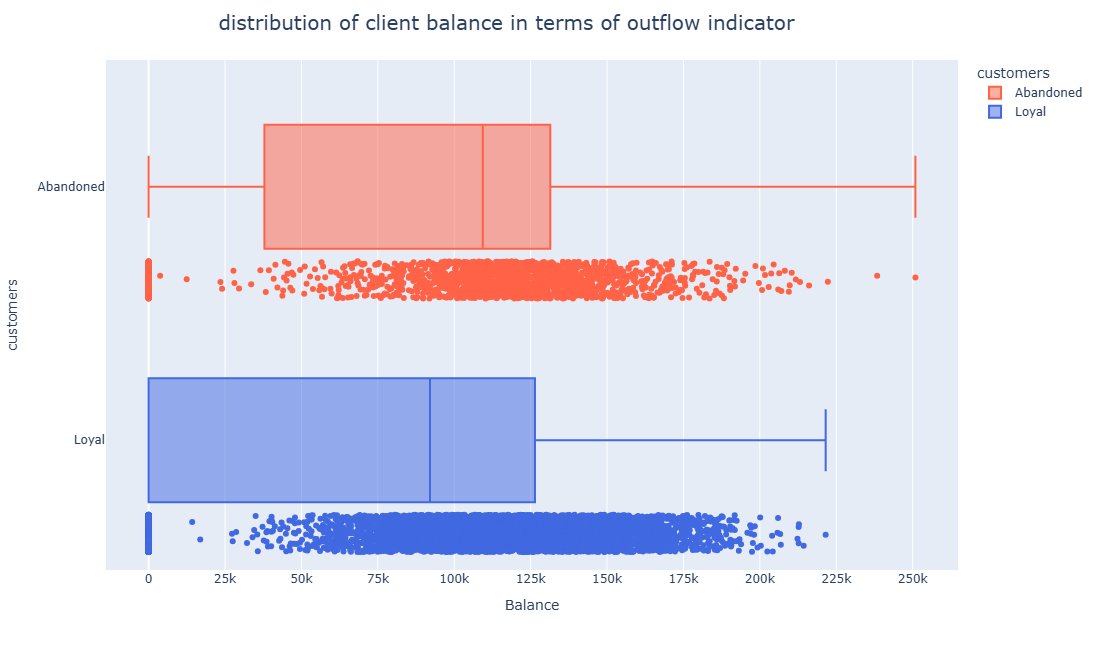

In [11]:
fig = px.box(data_frame=clients_df, 
             x='Balance', 
             y='Exited',
             height=650,
             width = 1000,
             color='Exited',
             points = 'all',
             color_discrete_sequence=['tomato', 'royalblue'],
             orientation = 'h',
             labels={'Exited':'customers'})

fig.update_layout(
    title_text = 'distribution of client balance in terms of outflow indicator',
    title_x = 0.46,
    title_font_size = 20,
    xaxis_tick0 = 0,
    xaxis_dtick = 25000,
)

fig.show()

При рассмотре расспределения баланса в разрезе признака оттока можно заметить:
1. 25% всех лояльных клиентов не имеет средст на счету.
2. Медиана и верхний квантиль покинувших банк клиентов были выше чем у лояльных
3. Отсутствуют выбросы.

В целом покинувшие банк клиенты хранили больше денег на своих счетах. На данном этапе не вижу причин, по которым клиенты могли покинуть банк.

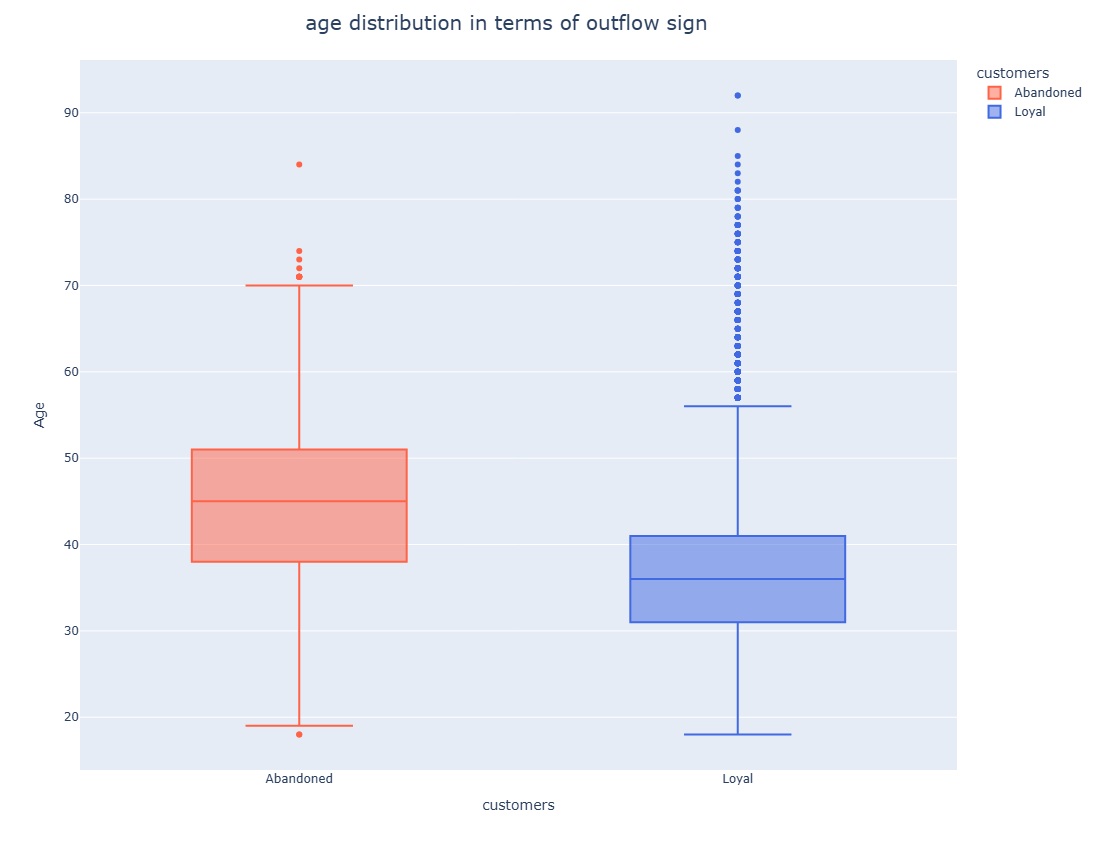

In [6]:
fig = px.box(data_frame=clients_df, 
             x='Exited', 
             y='Age', 
             height=850,
             width = 1000,
             color='Exited',
             color_discrete_sequence=['tomato', 'royalblue'],
             labels={'Exited':'customers'})

fig.update_layout(
    title_text = 'age distribution in terms of outflow sign',
    title_x = 0.46,
    title_font_size = 20
)

fig.show()

Возрастное распеределние в разрезе признака оттока показывает существенное различие в вострастных категориях
Покинувшие банк клиенты находятся в диапазоне от 38-51, тогда как лояльные от 31-41.
Так же для лояльных клиентов заметно большое количество выбросов.

На данном этапе можно сделать вывод, что основная часть покинувших банк, это клиенты в возрасте от 38-51, с более высоким показателем суммы на накопительных счетах.

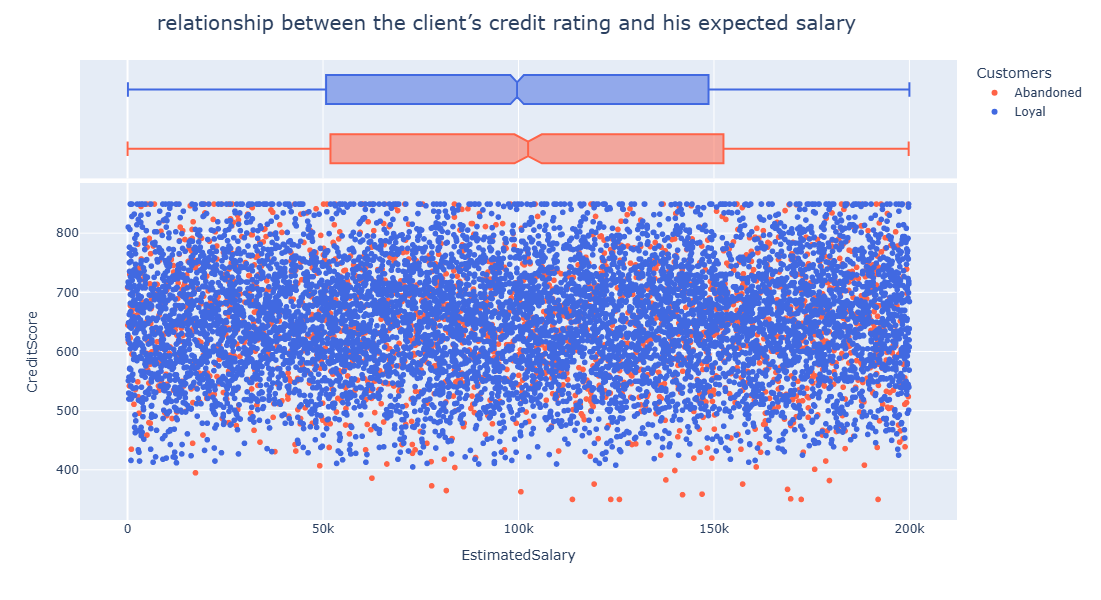

In [7]:
fig = px.scatter(data_frame=clients_df,
                x='EstimatedSalary',
                y='CreditScore',
                color='Exited',
                marginal_x = 'box',
                height=600,
                width=1000,
                color_discrete_sequence=['tomato', 'royalblue'],
                labels={'Exited': 'Customers'}
               )

fig.update_layout(
    title_text = 'relationship between the client’s credit rating and his expected salary',
    title_x = 0.46,
    title_font_size = 20,
    )

fig.show()

взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты не указывает на какие то существенные различия у обоих групп.
Можно отметить, что клиенты с самым низким рейтингом как раз находятся в группе покинувших банк. Но их количество недостаточно для влияния на общую картину.

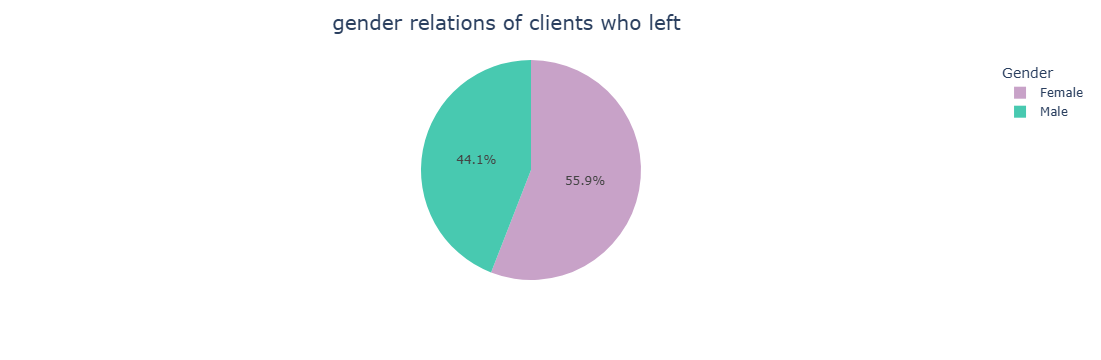

In [8]:
genders_dif = clients_df[clients_df['Exited'] == 'Abandoned']['Gender'].value_counts()
fig = px.pie(data_frame = clients_df,
             values = genders_dif.to_numpy(),
             names = genders_dif.index,
             color_discrete_sequence=['#C8A2C8', '#48c9b0'],
             width = 1000
            )

fig.update_layout(
    title_text = 'gender relations of clients who left',
    title_x = 0.46,
    title_font_size = 20,
    showlegend = True,
    legend_title = 'Gender'
    )


fig.show()


По половому признаку, срези ушедших клиентов, преобладают женщины

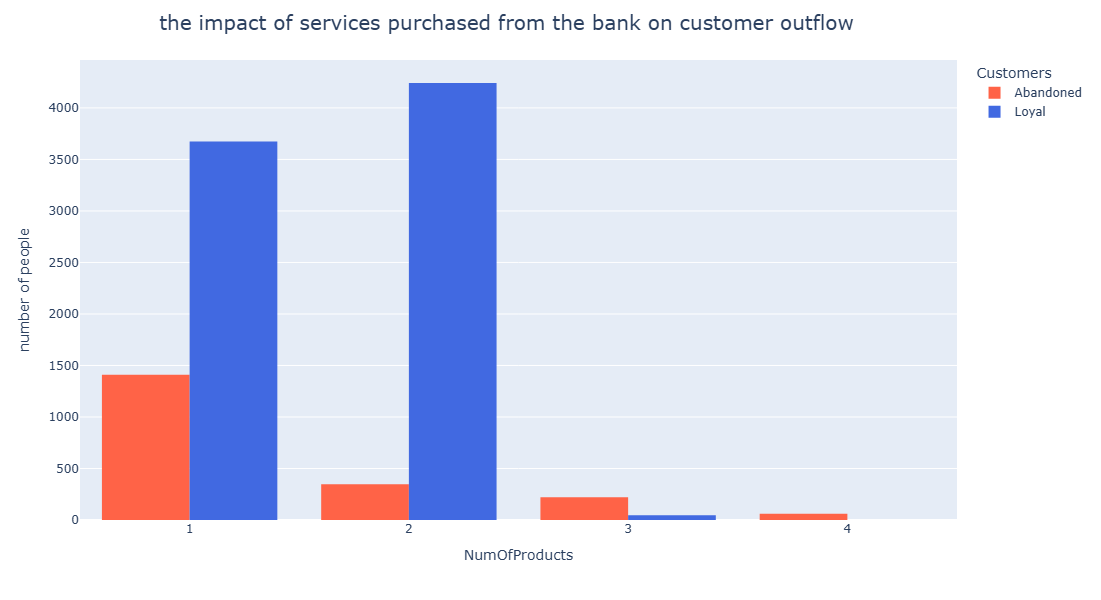

In [9]:
fig = px.histogram(data_frame = clients_df,
                   x = 'NumOfProducts',
                   color = 'Exited',
                   barmode = 'group',
                   labels = {'Exited': 'Customers'},
                   color_discrete_sequence=['tomato', 'royalblue'],
                   height = 600,
                   width = 1000,
                  )

fig.update_layout(
    title_text = 'the impact of services purchased from the bank on customer outflow',
    title_x = 0.46,
    title_font_size = 20, 
    yaxis_title = 'number of people'
    )

fig.show()

По данной таблице наблюдается тенеденция, с ростом количества приобретенных у банка услуг уменьшается количество покинувших банк клиентов.

С этого момента уже можно делать предположения о программе направлении программы удержания клиентов.
=> Предлагать для данной категории клиентов (клиенты в возрасте от 38-51, в частности женщины) более выгодные услуги.

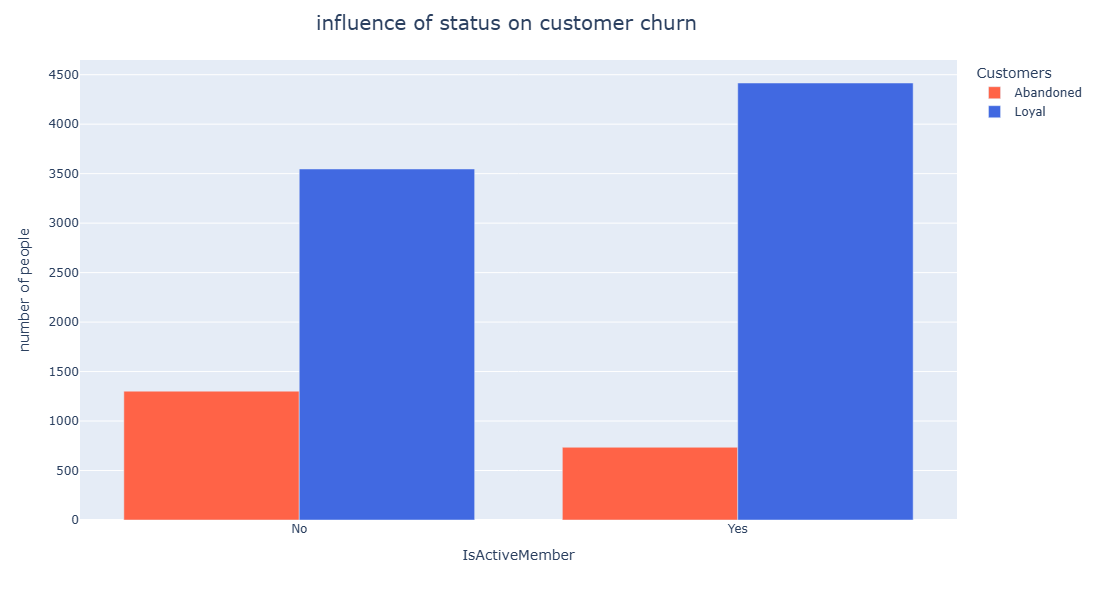

In [16]:
relation = pd.pivot_table(data = clients_df,
                     values = 'CustomerId',
                     index = 'IsActiveMember',
                     columns = 'Exited',
                     aggfunc = 'count')

relation.rename({0: 'No', 1: 'Yes'}, inplace=True)
fig = px.bar(data_frame = relation, 
             barmode = 'group',
             labels = {'Exited': 'Customers'},
             width = 1000,
             height = 600,
             color_discrete_sequence=['tomato', 'royalblue']
             )

fig.update_layout(
    title_text = 'influence of status on customer churn',
    title_x = 0.46,
    title_font_size = 20,
    yaxis_title = 'number of people'
    )

fig.show()

                 

Большое количество неактивных клиентов, что потенциально, является проблемой для банка. Неактивные клиенты можут превратиться в клиентов покинувшие банк

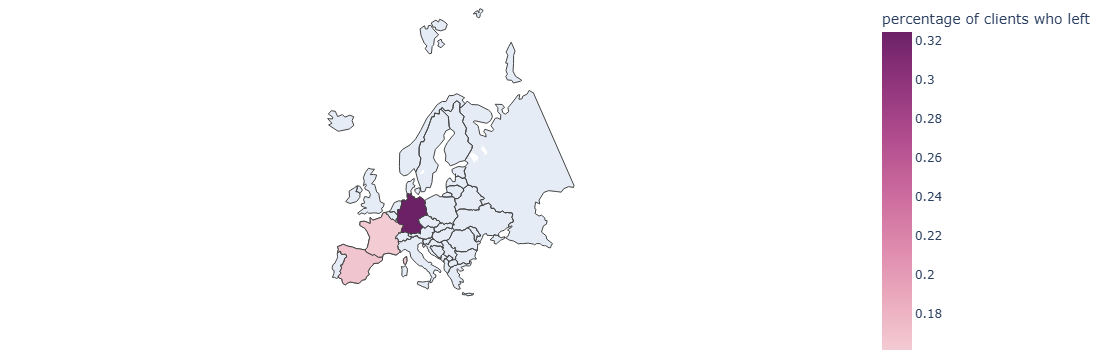

In [86]:
country_stat = clients_df.groupby('Geography')['Exited'].apply(
    lambda x: sum([1 if i == 'Abandoned' else 0 for i in x]) / len(x))

fig = px.choropleth(data_frame = country_stat,
                    locations = country_stat.index,
                    locationmode = 'country names',
                    color = country_stat.to_numpy(),
                    color_continuous_scale = 'magenta',
                    scope = 'europe',
                    labels = {'color': 'percentage of clients who left'}
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

По тепловой карте наибольшее количество ушедших клиентов из Германии

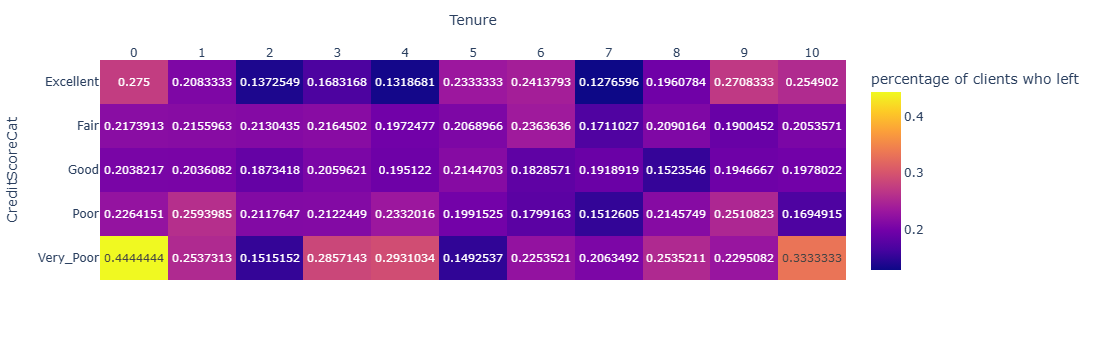

In [87]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

clients_df['CreditScoreCat'] = clients_df['CreditScore'].apply(get_credit_score_cat).astype('category')

pvt_table = pd.pivot_table(data = clients_df,
                           index = 'CreditScoreCat',
                           columns = 'Tenure',
                           values = 'Exited',
                           aggfunc = [lambda x: sum([1 if i == 'Abandoned' else 0 for i in x]) / len(x)],
                           observed = False
                          )


fig = px.imshow(pvt_table['<lambda>'],
                text_auto = True,
                aspect="auto",
                labels=dict(color="percentage of clients who left"),
                x = ['0','1','2','3','4','5','6','7','8','9','10']
                )

fig.update_xaxes(side="top")
fig.show()

По соотношению кредитного рейтинга к количеству лет, в течении которых клиент пользуется услугами банка, можно выделить:
1. Клиентов с самым низким рейтингом
2. Клинтов с любым рейтингом которые пользуются услугами банка <= 1 году
3. Клинтов с любым рейтингом которые пользуются услугами банка 9-10 лет

По итогу можно выделить несколько ключевых признаков по которым определяется отток клиентов: возраст, количество приобретенных у банка услуг, статус активного клиента.
Возможными решениями являются:
- предоставление дополнительных/больших бонусов активным клиентам
- специальные предложения для клиентов с количеством приобретенных услуг от 2 и более
- пенсионерам скидки =)